In [6]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
import os

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier


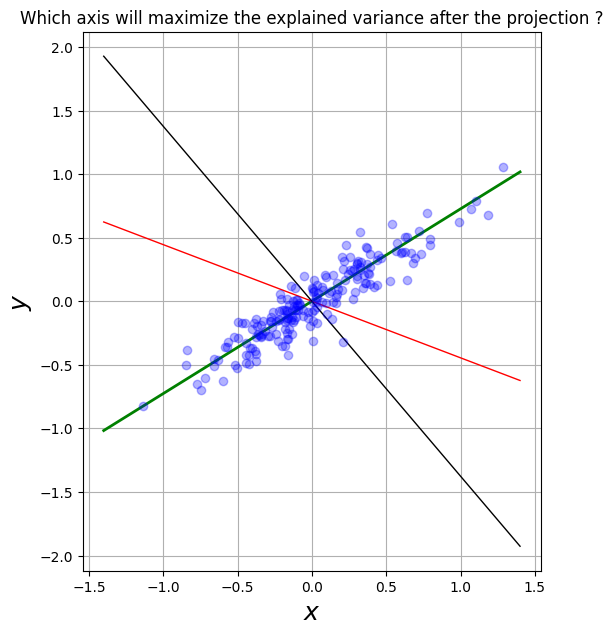

In [3]:
# Run this cell to generate and display the 2D data

angle = np.pi / 5
stretch = 5
m = 200

np.random.seed(50)
X = np.random.randn(m, 2) / 10
X = X.dot(np.array([[stretch, 0],[0, 1]])) # stretch
X = X.dot([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]]) # rotate

u1 = np.array([np.cos(angle), np.sin(angle)])
u2 = np.array([np.cos(angle - 2 * np.pi/6), np.sin(angle - 2 * np.pi/6)])
u3 = np.array([np.cos(angle - np.pi/2), np.sin(angle - np.pi/2)])

plt.figure(figsize=(13,7))
plt.subplot2grid((3,2), (0, 0), rowspan=3)
plt.plot([-1.4, 1.4], [-1.4*u1[1]/u1[0], 1.4*u1[1]/u1[0]], "g", linewidth=2)
plt.plot([-1.4, 1.4], [-1.4*u2[1]/u2[0], 1.4*u2[1]/u2[0]], "r", linewidth=1)
plt.plot([-1.4, 1.4], [-1.4*u3[1]/u3[0], 1.4*u3[1]/u3[0]], "k", linewidth=1)

plt.plot(X[:, 0], X[:, 1], "bo", alpha=0.3)

plt.xlabel("$x$", fontsize=18)
plt.ylabel("$y$", fontsize=18)
plt.grid(True)
plt.title("Which axis will maximize the explained variance after the projection ?")

plt.show();


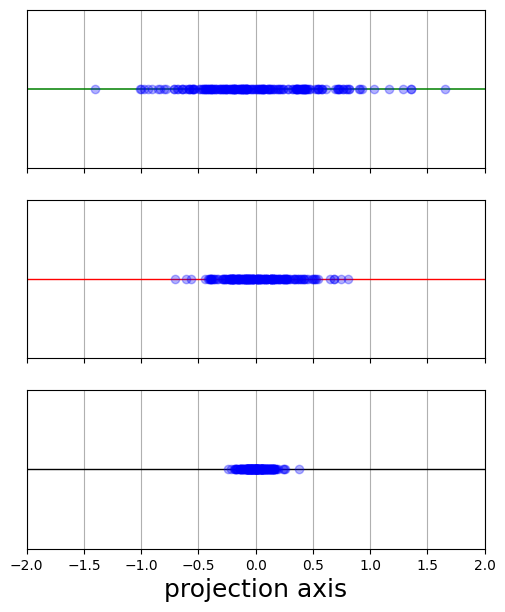

In [4]:
# Run this cell to project the datat on the 3 axes

X_proj1 = X.dot(u1.reshape(-1, 1))
X_proj2 = X.dot(u2.reshape(-1, 1))
X_proj3 = X.dot(u3.reshape(-1, 1))

plt.figure(figsize=(13,7))

plt.subplot2grid((3,2), (0, 1))
plt.plot([-2, 2], [0, 0], "g", linewidth=1.1)
plt.plot(X_proj1[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (1, 1))
plt.plot([-2, 2], [0, 0], "r", linewidth=1)
plt.plot(X_proj2[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.gca().get_xaxis().set_ticklabels([])
plt.axis([-2, 2, -1, 1])
plt.grid(True)

plt.subplot2grid((3,2), (2, 1))
plt.plot([-2, 2], [0, 0], "k", linewidth=1)
plt.plot(X_proj3[:, 0], np.zeros(m), "bo", alpha=0.3)
plt.gca().get_yaxis().set_ticks([])
plt.axis([-2, 2, -1, 1])
plt.xlabel("projection axis", fontsize=18)
plt.grid(True)

plt.show()


In [5]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("zalando-research/fashionmnist")

print("Path to dataset files:", path)

/Users/notagain/.pyenv/versions/3.10.0/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


100%|██████████| 68.8M/68.8M [00:05<00:00, 12.1MB/s]

Extracting files...


Path to dataset files: /Users/notagain/.cache/kagglehub/datasets/zalando-research/fashionmnist/versions/4


In [9]:
df = pd.read_csv(os.path.join(path,os.listdir(path)[-2]))

In [10]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
target = df['label']
data = df.drop('label', axis = 1)


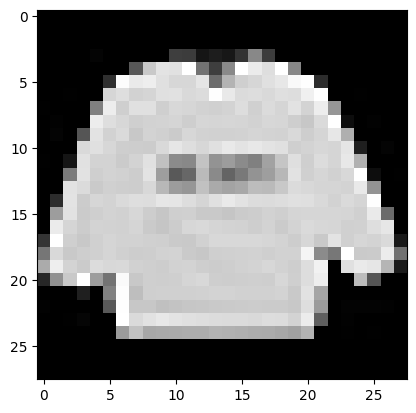

In [12]:
img = data.iloc[0]
img = np.array(img).reshape((28,28))
# We transform the img variable into a numpy object before reshaping to avoid a warning.
plt.imshow(img, cmap = 'gray')

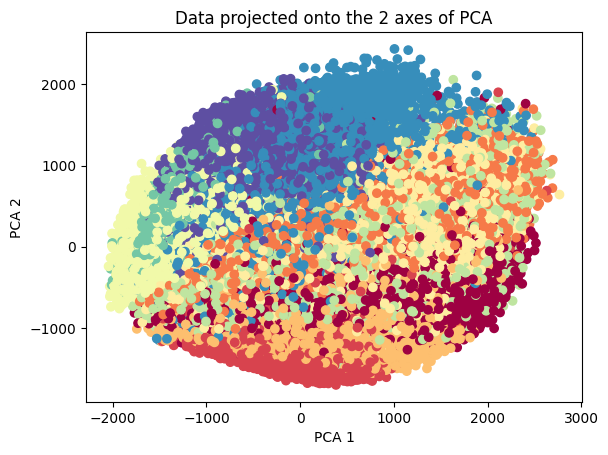

The explained variance ratio is 0.47


In [13]:
pca = PCA(n_components = 2)
data_2D = pca.fit_transform(data)

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(data_2D[:, 0], data_2D[:, 1], c = target, cmap=plt.cm.Spectral)

ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')

ax.set_title("Data projected onto the 2 axes of PCA")
plt.show()

print("The explained variance ratio is", round(pca.explained_variance_ratio_.sum(),2))

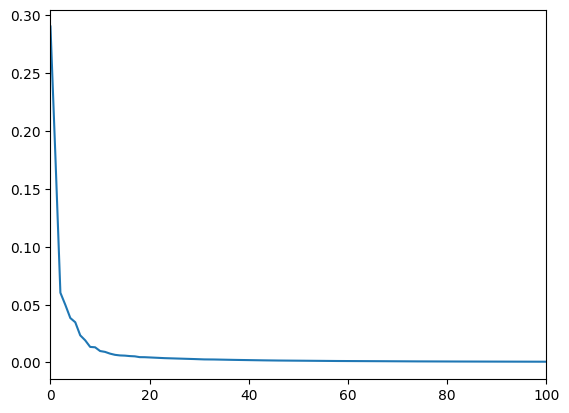

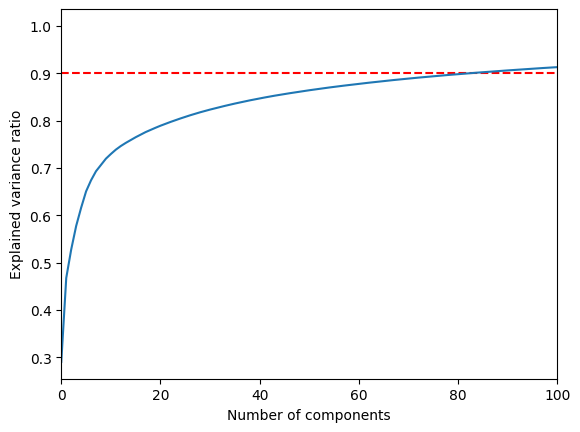

In [14]:
pca = PCA()
pca.fit(data)

plt.figure()
plt.xlim(0, 100)
plt.plot(pca.explained_variance_ratio_);

plt.figure()
plt.xlim(0, 100)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.plot(pca.explained_variance_ratio_.cumsum())

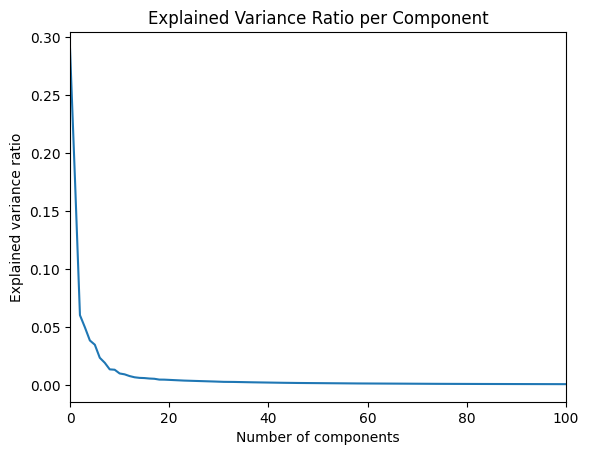

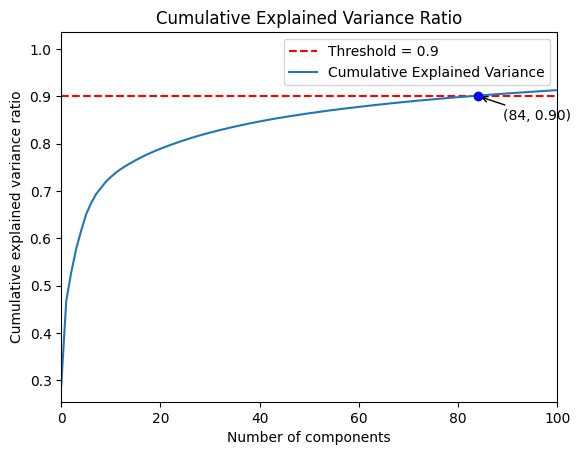

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Example: Replace 'data' with your actual dataset
# data = ...

pca = PCA()
pca.fit(data)

# Cumulative explained variance ratio
cumulative_variance = pca.explained_variance_ratio_.cumsum()

# Find the first component where cumulative variance exceeds the threshold (0.9)
threshold = 0.9
n_components = np.argmax(cumulative_variance >= threshold) + 1  # +1 to account for zero indexing

# Plot explained variance ratio
plt.figure()
plt.xlim(0, 100)
plt.plot(pca.explained_variance_ratio_)
plt.xlabel('Number of components')
plt.ylabel('Explained variance ratio')
plt.title('Explained Variance Ratio per Component')

# Plot cumulative explained variance ratio
plt.figure()
plt.xlim(0, 100)
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance ratio')
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold = {threshold}')
plt.plot(cumulative_variance, label='Cumulative Explained Variance')

# Annotate the intersection point
plt.scatter(n_components, cumulative_variance[n_components - 1], color='blue', zorder=5)
plt.annotate(
    f'({n_components}, {cumulative_variance[n_components - 1]:.2f})',
    xy=(n_components, cumulative_variance[n_components - 1]),
    xytext=(n_components + 5, cumulative_variance[n_components - 1] - 0.05),
    arrowprops=dict(facecolor='black', arrowstyle='->'),
    fontsize=10
)

plt.legend()
plt.title('Cumulative Explained Variance Ratio')
plt.show()


In [17]:
pca = PCA(n_components = 0.9)
pca.fit(data)
print("Number of components retained:", pca.n_components_)

Number of components retained: 84


In [21]:
os.path.join(path,os.listdir(path)[1])

'fashion-mnist_test.csv'

In [ ]:
df = pd.read_csv(os.path.join(path,os.listdir(path)[-2]))

In [23]:
X_test = pd.read_csv(os.path.join(path,os.listdir(path)[1]))
X_train = pd.read_csv(os.path.join(path,os.listdir(path)[-2]))

y_test = X_test['label']
y_train = X_train['label']

X_test = X_test.drop('label', axis = 1)
X_train = X_train.drop('label', axis = 1)

In [24]:
clf = RandomForestClassifier(n_jobs = -1)
# The n_jobs argument is not -1 by default. This value forces the processor to use all its parallel computing power.
clf.fit(X_train, y_train)
clf.score(X_test, y_test)

0.8841

In [25]:
pca = PCA(n_components = 0.9)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [26]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)


0.8663

In [27]:
lda = LDA()
X_train_lda = lda.fit_transform(X_train, y_train)
X_test_lda = lda.transform(X_test)
X_train_lda.shape

(60000, 9)

In [28]:
clf = RandomForestClassifier(n_jobs = -1)
clf.fit(X_train_lda, y_train)
clf.score(X_test_lda, y_test)

0.8415

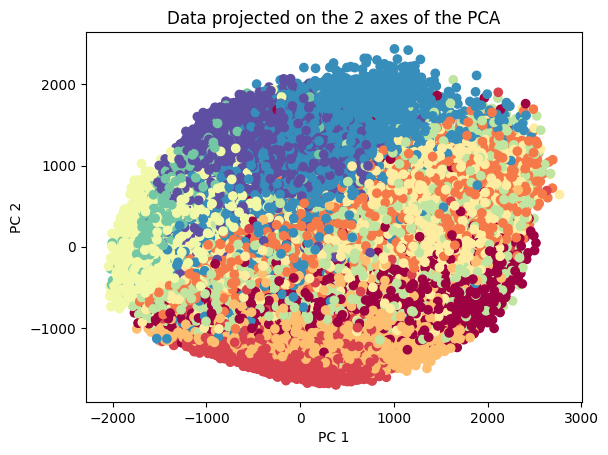

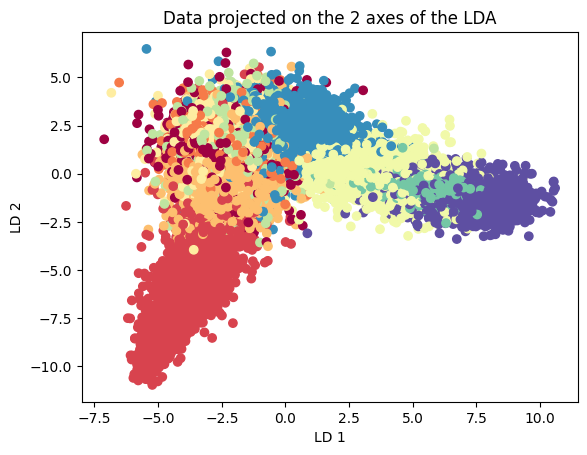

In [29]:
fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1],  c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')

ax.set_title("Data projected on the 2 axes of the PCA")
plt.show();

fig = plt.figure()

ax = fig.add_subplot(111)
ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c = y_train, cmap=plt.cm.Spectral)

ax.set_xlabel('LD 1')
ax.set_ylabel('LD 2')

ax.set_title("Data projected on the 2 axes of the LDA")
plt.show();
